# XGBoost

In [108]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib import figure as fig

## Pima Indians Dataset

In [9]:
#Load the data Pima Indians dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
dataset_pd = pd.read_csv(url)
dataset = np.array(dataset_pd)
dataset.shape

(767, 9)

In [10]:
# Seperating target and predictors
X = dataset[:,0:8]
y = dataset[:,8]

In [12]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [17]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [25]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 71.65%


The accuracy of the model is 71.65%. We are correctly predicting the class 71.65% of the time.

* Boosting Algorithm expects only the numerical variables. So we need to conver categorical to numerical variables.

## Iris dataset (Encoding Categorical variables)

In [27]:
# Loading the Iris dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Iris.csv"
data = pd.read_csv(url)
dataset = data.values
dataset.shape

(149, 5)

In [30]:
# Seperating target and predictors
X = dataset[:,0:4]
y = dataset[:,4]

In [31]:
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

In [33]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, label_encoder_y, test_size = 0.33, random_state = 7)

In [34]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [36]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 92.00%


The objective function has changed to "multi:softprob" because of the multiclass classification. We will now look at a dataset where all the variables are categorical.

## Breast Cancer Dataset (One Hot Encoding) :-

In [47]:
# Loading the Breast Cancer dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/breast-cancer.data"
data = pd.read_csv(url, header = None)
dataset = data.values
dataset.shape

(286, 10)

In [49]:
# Seperating target and predictors
X = dataset[:,0:9]
y = dataset[:,9]

In [53]:
columns = []
for i in range(X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse = False)
    feature = onehot_encoder.fit_transform(feature)
    columns.append(feature)

# Collapse columns into array
encoded_x = np.column_stack(columns)

In [57]:
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

In [58]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoder_y, test_size = 0.33, random_state = 7)

In [59]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [61]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 71.58%


## Horse Colic Dataset (Support for Missing Data) :-

XGBoost is designed to work with sparse data or the missing data. We will now use a data with a lot missing values.

In [66]:
# Loading the Horse Colic dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Horse_Colic.csv"
data = pd.read_csv(url, header = None)
dataset = data.values
dataset.shape

(300, 28)

In [70]:
# set missing value to 0
dataset[dataset == '?'] = 0
dataset = dataset.astype('float32')

In [74]:
# Seperating target and predictors
X = dataset[:,0:27]
y = dataset[:,27]

In [75]:
#Encode string values as numerical
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoder_y = label_encoder.transform(y)

In [76]:
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, label_encoder_y, test_size = 0.33, random_state = 7)

In [77]:
# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# Make prediction with XGBoost Model
predictions = model.predict(X_test)

In [79]:
# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 82.83%


We have changed the "?" to 0 in above example. 0 is the sparse value expected by XGBoost. Now we will just replace with "?" with Nan.

In [80]:
dataset = data.values
dataset[dataset == '?'] = np.nan
dataset = dataset.astype('float32')
X = dataset[:,0:27]

# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, label_encoder_y, test_size = 0.33, random_state = 7)

# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

# Make prediction with XGBoost Model
predictions = model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 83.84%


We will now impute the missing values using mean value.

In [83]:
impute = SimpleImputer()
imputed_x = impute.fit_transform(X)
# Train and test split of the data
X_train, X_test, y_train, y_test = train_test_split(imputed_x, label_encoder_y, test_size = 0.33, random_state = 7)

# Fitting the XGBoost Model. The XGBoost use Scikit - learn API.
model = xg.XGBClassifier()
model.fit(X_train, y_train)

# Make prediction with XGBoost Model
predictions = model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy* 100))

Accuracy: 81.82%


## Evaluate Model using K-Fold Cross Validation

In [88]:
#Load the data Pima Indians dataset.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
dataset_pd = pd.read_csv(url)
dataset = np.array(dataset_pd)

# Seperating target and predictors
X = dataset[:,0:8]
y = dataset[:,8]

model = xg.XGBClassifier()
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, y, cv = kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.67% (4.58%)


For an imbalanced class problem, we might wants to use stratifiedKFold.

In [91]:
kfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(model, X, y, cv = kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 73.55% (4.64%)


### Plotting a tree from XGBoost

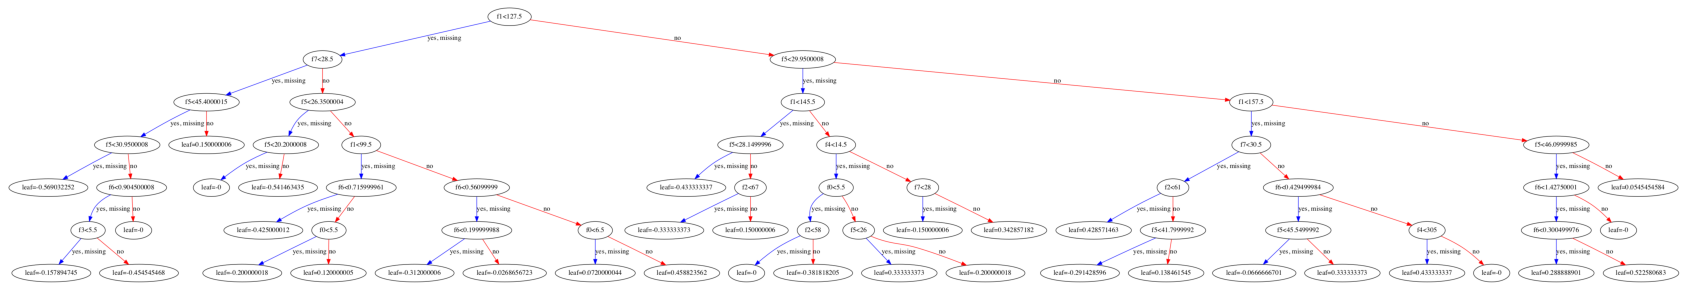

In [124]:
model = xg.XGBClassifier()
model.fit(X,y)
fig, ax = plt.subplots(figsize=(30, 60))
xg.plot_tree(model, ax = ax, num_tree = 0)
plt.show()

## Save and load trained XGBoost Models